In [1]:
from load_data import load_breast_cancer_data, load_wine_quality_data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

%load_ext autoreload
%autoreload 2

# Data loading and preprocessing

In [2]:
# Read data
X1, y1 = load_breast_cancer_data('../data/breast-cancer-wisconsin-data/data.csv')
X2, y2 = load_wine_quality_data('../data/wine-quality/winequality-white.csv')

# Print information about the datasets
print ("<------------------------ Breast Cancer Dataset ------------------------>")
print ("Total number of examples: ", X1.shape[0])
print ("Fraction of positive examples: %.2f%%" % (y1[y1 == 1].shape[0]/y1.shape[0]*100.0))
print ("Number of features: ", X1.shape[1])
print()
print ("<------------------------ Wine Quality Dataset ------------------------>")
print ("Total number of examples: ", X2.shape[0])
print ("Fraction of positive examples: %.2f%%" % (y2[y2 == 1].shape[0]/y2.shape[0]*100.0))
print ("Number of features: ", X2.shape[1])
print()

# Random seed for reproducibility of experiments
random_seed = 7641
np.random.seed(random_seed)

# Standardize data
X1 = preprocessing.scale(X1)
X2 = preprocessing.scale(X2)

<------------------------ Breast Cancer Dataset ------------------------>
Total number of examples:  569
Fraction of positive examples: 37.26%
Number of features:  30

<------------------------ Wine Quality Dataset ------------------------>
Total number of examples:  4898
Fraction of positive examples: 66.52%
Number of features:  11



# Clustering without dimensionality reduction

## k-means

In [3]:
# Find the optimal k
k_grid = np.arange(2, 31)
# k_grid = np.arange(2, 31, 2)
loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs=-1)
    kmeans.fit(X1)
    loss1[idx] = kmeans.inertia_
    kmeans.fit(X2)
    loss2[idx] = kmeans.inertia_

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20
k =  21
k =  22
k =  23
k =  24
k =  25
k =  26
k =  27
k =  28
k =  29
k =  30


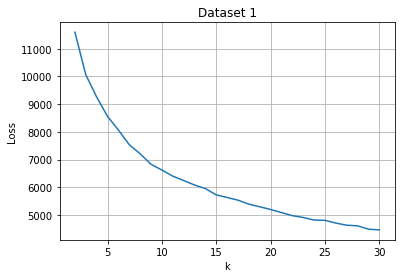

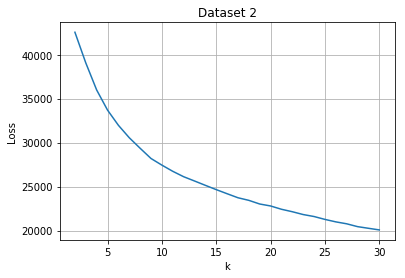

In [4]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid, loss1)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 1')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/kmeans_loss_1.png')

plt.figure()
plt.plot(k_grid, loss2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 2')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/kmeans_loss_2.png')

In [5]:
# Choose k according to the approximate elbow location
k1 = 9
k2 = 9

In [6]:
# Run kmeans again with optimal k values
kmeans1 = KMeans(n_clusters=k1, random_state=random_seed, max_iter=300, n_jobs=-1)
kmeans2 = KMeans(n_clusters=k2, random_state=random_seed, max_iter=300, n_jobs=-1)
kmeans1.fit(X1)
kmeans2.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=7641, tol=0.0001, verbose=0)

### Evaluate quality of clusters

In [7]:
print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', kmeans1.inertia_)
score1 = silhouette_score(X1, kmeans1.labels_)
print('Silhouette score: ', score1)
ami1 = adjusted_mutual_info_score(y1, kmeans1.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2.inertia_)
score2 = silhouette_score(X2, kmeans2.labels_)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y2, kmeans2.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  6829.788166389803
Silhouette score:  0.14099752149567427
Adjusted Mutual Information (AMI) score:  0.230993115481309

<------------------------ Dataset 2 ------------------------>
Inertia:  28198.160624425534


E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette score:  0.12861663122535333
Adjusted Mutual Information (AMI) score:  0.038472012796217085



E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Visualization of clusters

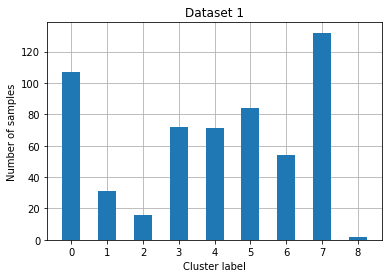

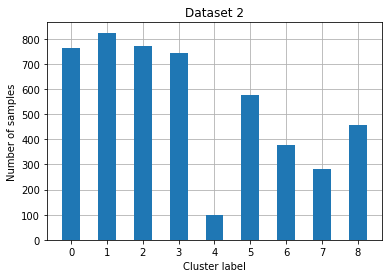

In [8]:
# Dataset 1
plt.figure()
plt.hist(kmeans1.labels_, bins=np.arange(0, k1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/kmeans_hist_1.png')

# Dataset 2
plt.figure()
plt.hist(kmeans2.labels_, bins=np.arange(0, k2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/kmeans_hist_2.png')

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...    perimeter_worst  area_worst  \
0                2.255747  

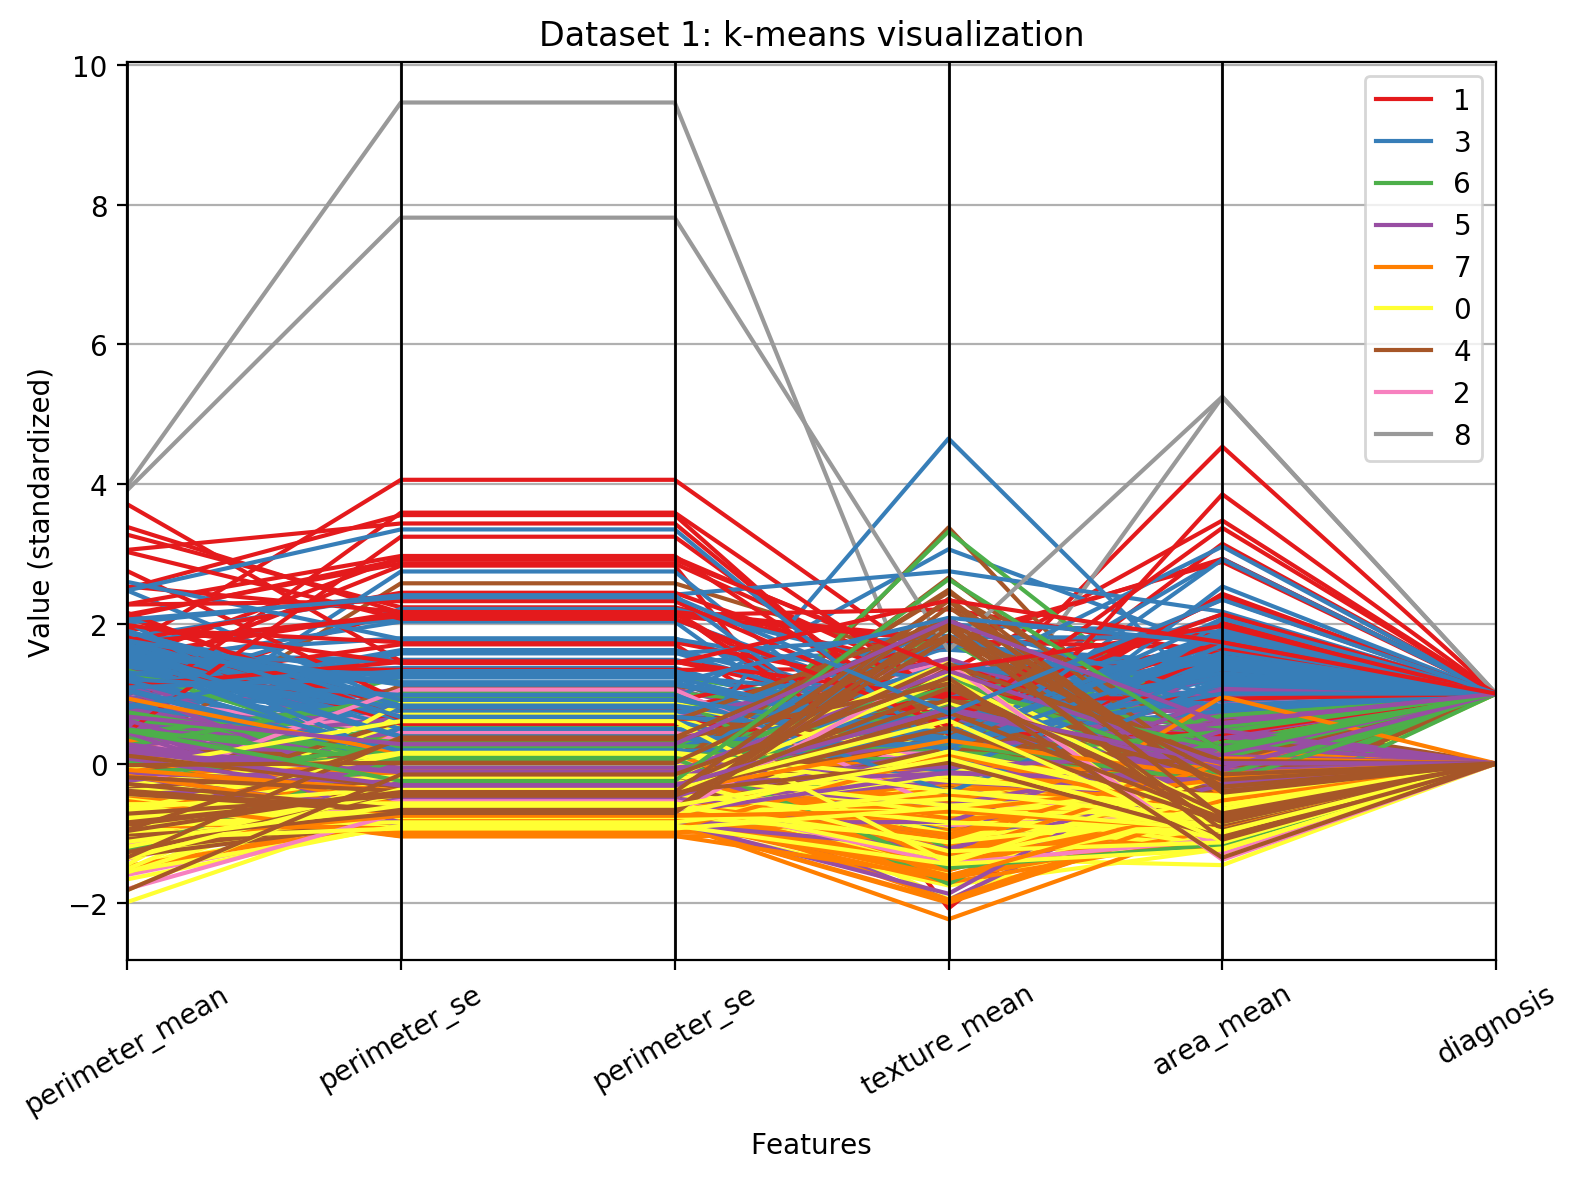

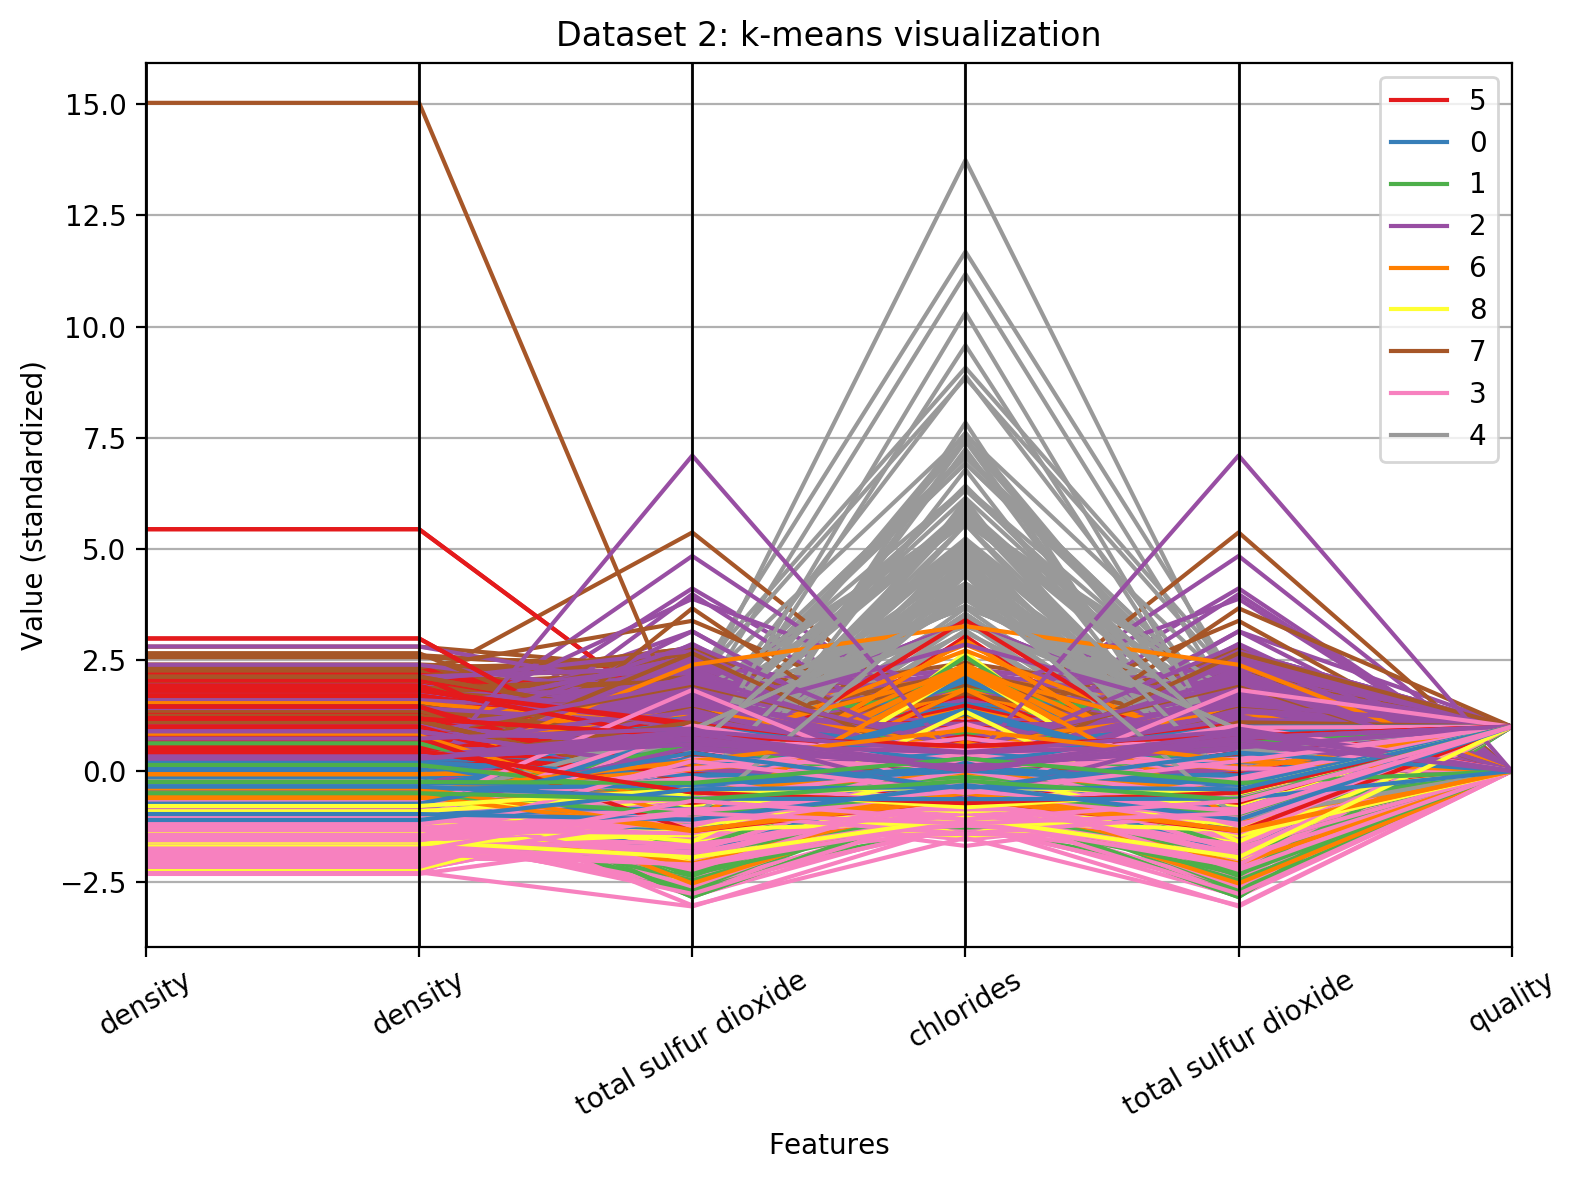

In [9]:
# Dataset 1
df1 = pd.read_csv('../data/breast-cancer-wisconsin-data/data.csv', nrows=1)
to_drop = ['Unnamed: 32', 'id', 'diagnosis']
df1 = df1.drop(to_drop, axis=1)
cols1 = df1.columns
df1 = pd.DataFrame(X1, columns = cols1)
df1['diagnosis'] = y1
df1['class'] = kmeans1.labels_
print(df1.head(5))

# Parallel coordinates plot
rand_idx1 = np.random.randint(0, df1.shape[1] - 2, 5)   # randomly pick 5 features for visualization
idx_viz1 = np.append(rand_idx1, [df1.shape[1] - 2, df1.shape[1] - 1])    # Add ground truth label and cluster label

# plt.figure(figsize=(10, 7.5), dpi=250)
plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df1.iloc[:, idx_viz1], 'class', colormap='Set1')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value (standardized)')
plt.title('Dataset 1: k-means visualization')
plt.tight_layout()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/kmeans_viz_1.png')

# Dataset 2
df2 = pd.read_csv('../data/wine-quality/winequality-white.csv', sep=';', nrows=1)
to_drop = ["quality"]
df2 = df2.drop(to_drop, axis=1)
cols2 = df2.columns
df2 = pd.DataFrame(X2, columns = cols2)
df2['quality'] = y2
df2['class'] = kmeans2.labels_
print(df2.head(5))

# Parallel coordinates plot
rand_idx2 = np.random.randint(0, df2.shape[1] - 2, 5)   # randomly pick 5 features for visualization
idx_viz2 = np.append(rand_idx2, [df2.shape[1] - 2, df2.shape[1] - 1])    # Add ground truth label and cluster label

# plt.figure(figsize=(10, 7.5), dpi=250)
plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df2.iloc[:, idx_viz2], 'class', colormap='Set1')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value (standardized)')
plt.title('Dataset 2: k-means visualization')
plt.tight_layout()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/kmeans_viz_2.png')

## GMM

In [10]:
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 31)
n_components_grid2 = np.arange(2, 51)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

print ("<------------------------ Dataset 1 ------------------------>")
for idx, n_components in enumerate(n_components_grid1):
    print ("Number of components = ", n_components)
    gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed)
    gmm1.fit(X1)
    bic1[idx] = gmm1.bic(X1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed)
    gmm2.fit(X2)
    bic2[idx] = gmm2.bic(X2)

<------------------------ Dataset 1 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =  5
Number of components =  6
Number of components =  7
Number of components =  8
Number of components =  9
Number of components =  10
Number of components =  11
Number of components =  12
Number of components =  13
Number of components =  14
Number of components =  15
Number of components =  16
Number of components =  17
Number of components =  18
Number of components =  19
Number of components =  20
Number of components =  21
Number of components =  22
Number of components =  23
Number of components =  24
Number of components =  25
Number of components =  26
Number of components =  27
Number of components =  28
Number of components =  29
Number of components =  30

<------------------------ Dataset 2 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =

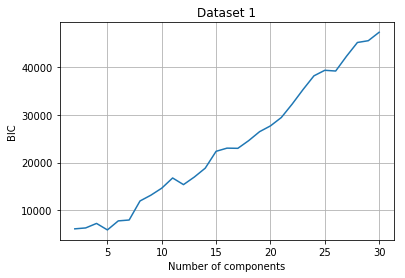

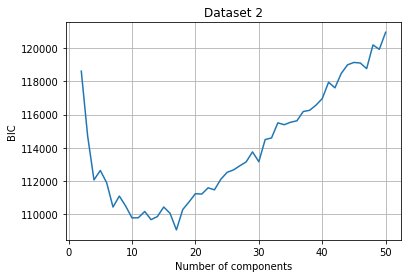

In [11]:
# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid1, bic1)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 1')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_bic_1.png')

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_bic_2.png')

In [12]:
n_best_1 = n_components_grid1[np.argmin(bic1)]
print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)

Optimal number of components for dataset 1:  5
Optimal number of components for dataset 2:  17


In [13]:
# Run GMM-EM again with the optimal number of components
gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed, max_iter=1000)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed, max_iter=1000)
gmm1.fit(X1)
gmm_labels1 = gmm1.predict(X1)
gmm2.fit(X2)
gmm_labels2 = gmm2.predict(X2)

### Evaluate quality of clusters

In [14]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X1))
score1_gmm = silhouette_score(X1, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X2))
score2_gmm = silhouette_score(X2, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  5869.395908172237
Silhouette score:  0.11810474319160252
Adjusted Mutual Information (AMI) score:  0.24473946470782326

<------------------------ Dataset 2 ------------------------>
BIC:  109069.36751950567


E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette score:  -0.004039904042132732
Adjusted Mutual Information (AMI) score:  0.030943328002423564



E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Visualization of clusters

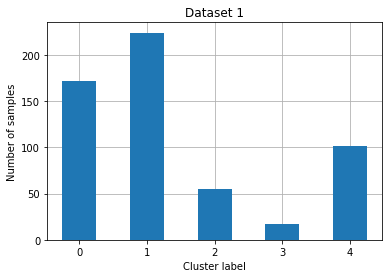

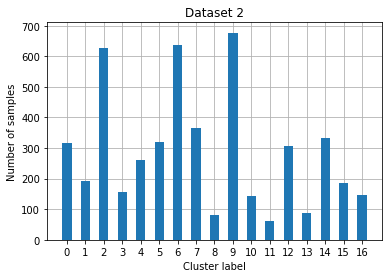

In [15]:
# Dataset 1
plt.figure()
plt.hist(gmm_labels1, bins=np.arange(0, n_best_1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_best_1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_hist_1.png')

# Dataset 2
plt.figure()
plt.hist(gmm_labels2, bins=np.arange(0, n_best_2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_best_2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_hist_2.png')

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...    perimeter_worst  area_worst  \
0                2.255747  

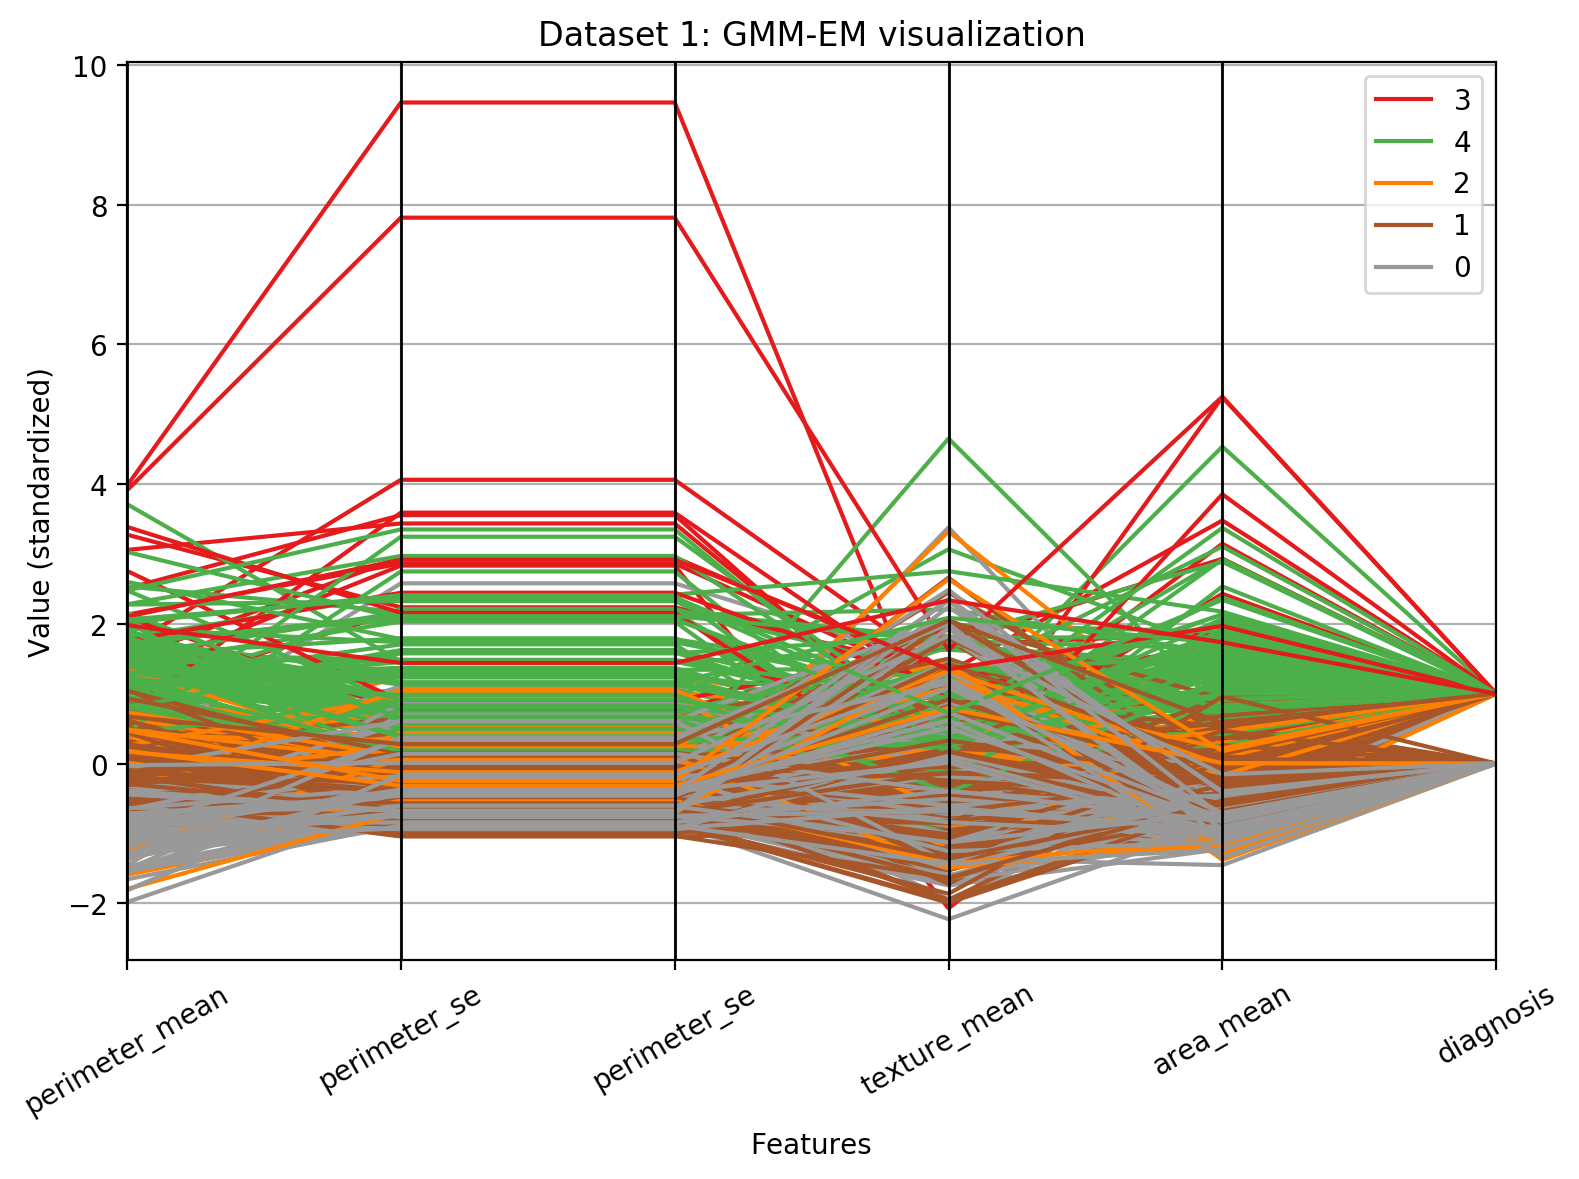

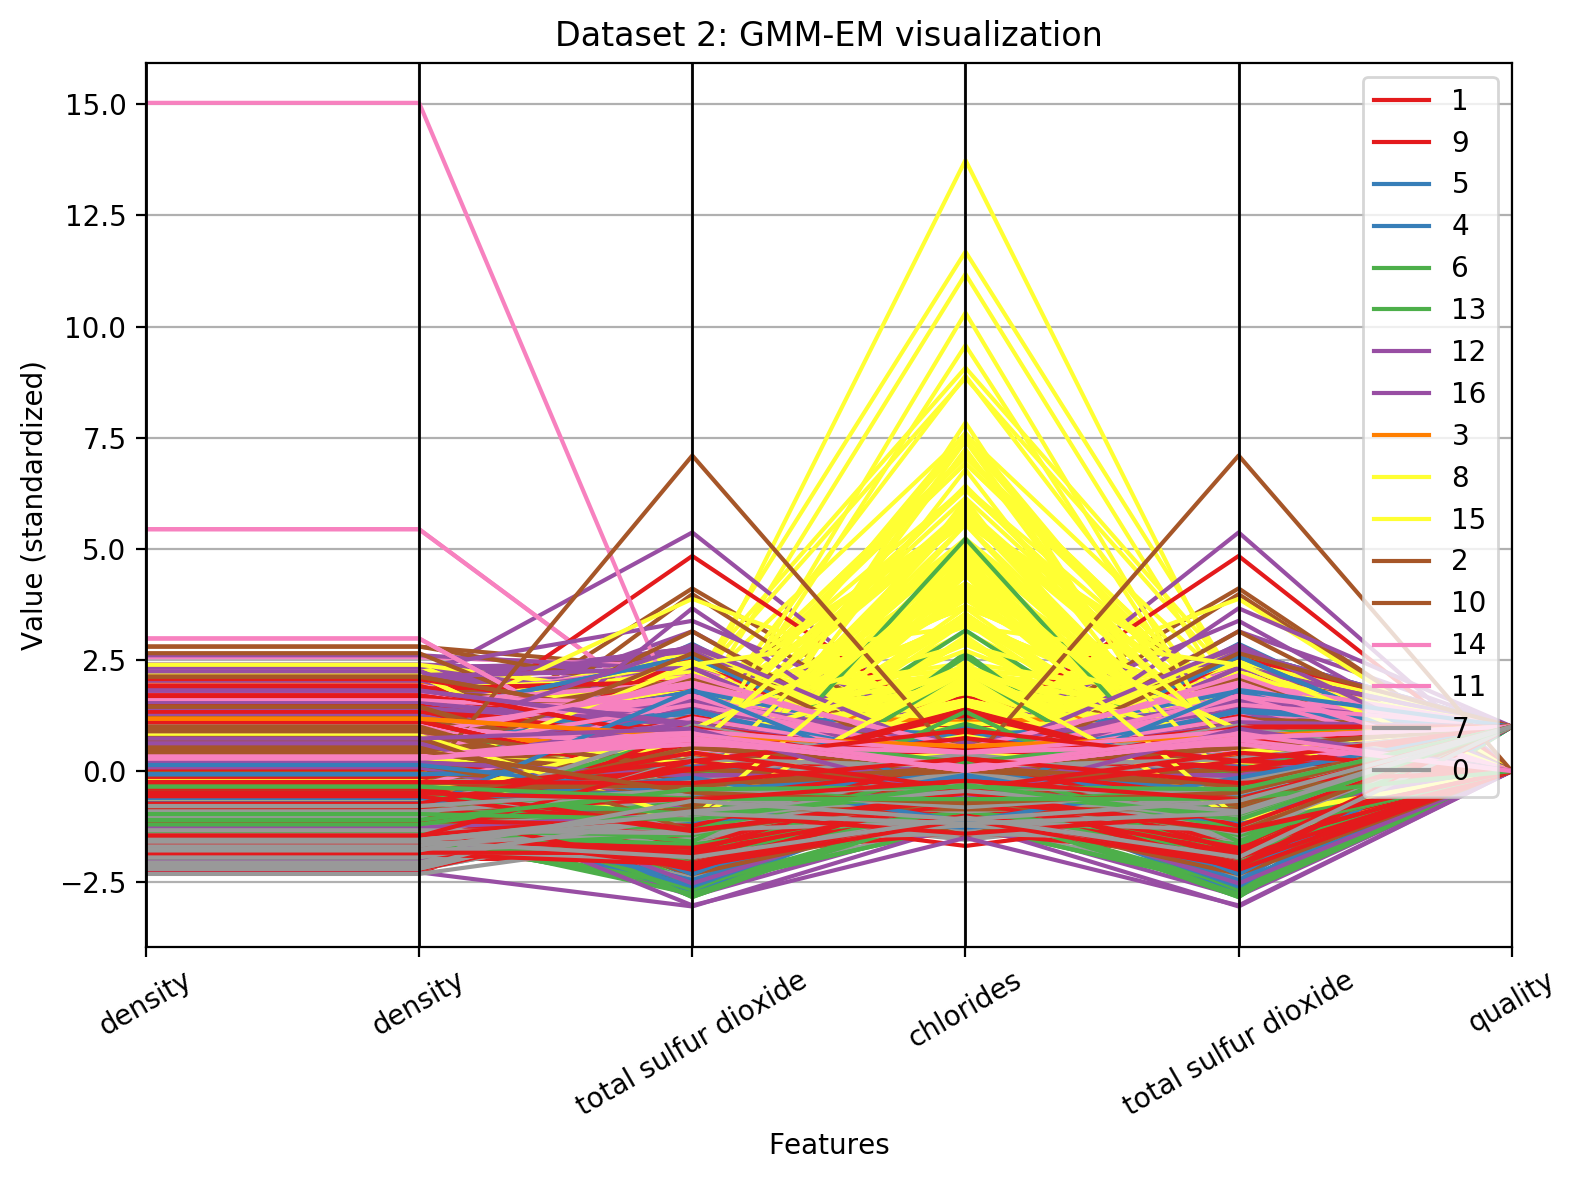

In [16]:
# Dataset 1
df1_gmm = pd.read_csv('../data/breast-cancer-wisconsin-data/data.csv', nrows=1)
to_drop = ['Unnamed: 32', 'id', 'diagnosis']
df1_gmm = df1_gmm.drop(to_drop, axis=1)
cols1 = df1_gmm.columns
df1_gmm = pd.DataFrame(X1, columns = cols1)
df1_gmm['diagnosis'] = y1
df1_gmm['class'] = gmm_labels1
print(df1_gmm.head(5))

# Parallel coordinates plot
idx_viz1_gmm = idx_viz1    # pick the same 5 features used in kmeans for visualization

# plt.figure(figsize=(10, 7.5), dpi=250)
plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df1_gmm.iloc[:, idx_viz1_gmm], 'class', colormap='Set1')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value (standardized)')
plt.title('Dataset 1: GMM-EM visualization')
plt.tight_layout()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_viz_1.png')

# Dataset 2
df2_gmm = pd.read_csv('../data/wine-quality/winequality-white.csv', sep=';', nrows=1)
to_drop = ["quality"]
df2_gmm = df2_gmm.drop(to_drop, axis=1)
cols2 = df2_gmm.columns
df2_gmm = pd.DataFrame(X2, columns = cols2)
df2_gmm['quality'] = y2
df2_gmm['class'] = gmm_labels2
print(df2_gmm.head(5))

# Parallel coordinates plot
idx_viz2_gmm = idx_viz2    # pick the same 5 features used in kmeans for visualization

# plt.figure(figsize=(10, 7.5), dpi=250)
plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df2_gmm.iloc[:, idx_viz2_gmm], 'class', colormap='Set1')
plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value (standardized)')
plt.title('Dataset 2: GMM-EM visualization')
plt.tight_layout()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_viz_2.png')

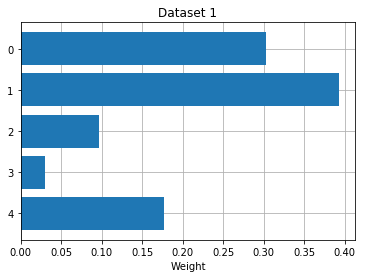

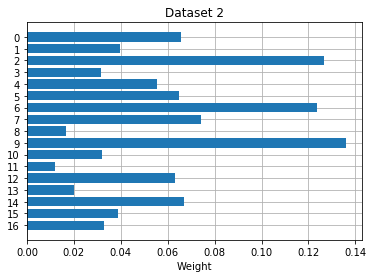

In [17]:
plt.figure()
plt.barh(np.arange(n_best_1), gmm1.weights_, zorder=2)
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 1')
plt.xlabel('Weight')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_wts_1.png')

plt.figure()
plt.barh(np.arange(n_best_2), gmm2.weights_, zorder=2)
plt.gca().set_yticks(np.arange(n_best_2))
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 2')
plt.xlabel('Weight')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_wts_2.png')

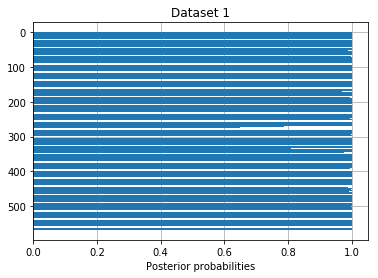

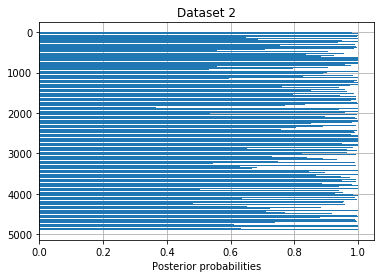

In [18]:
probs1 = np.amax(gmm1.predict_proba(X1), axis=1)
plt.figure()
plt.barh(np.arange(X1.shape[0]), probs1, zorder=2)
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 1')
plt.xlabel('Posterior probabilities')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_probs_1.png')

probs2 = np.amax(gmm2.predict_proba(X2), axis=1)
plt.figure()
plt.barh(np.arange(X2.shape[0]), probs2, zorder=2)
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 2')
plt.xlabel('Posterior probabilities')
plt.grid()
plt.savefig('C:/Users/User/Downloads/nthakurdesai3/nthakurdesai3/code/plots/gmm_probs_2.png')